In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [29]:
df_2004 = pd.read_csv('data/건강검진정보_2004.CSV', encoding='euc-kr', low_memory=False)
df_2009 = pd.read_csv('data/건강검진정보_2009(수정).csv', encoding='euc-kr', low_memory=False)
df_2014 = pd.read_csv('data/건강검진정보_2014.CSV', encoding='euc-kr', low_memory=False)
df_2018 = pd.read_csv('data/건강검진정보_2018.csv', encoding='euc-kr')
df_2019 = pd.read_csv('data/건강검진정보_2019(수정).csv', encoding='euc-kr', low_memory=False)

In [30]:
df_2018['BMI'] =df_2018['체중(5Kg단위)'] /(df_2018['신장(5Cm단위)']/100) **2
df_2018['비만'] = (df_2018['BMI'] >= 25)
df_2018['정상'] = (df_2018['BMI'] < 25)

In [31]:
df_2018['비흡연자'] = (df_2018['흡연상태'] == 1) | (df_2018['흡연상태'] == 2) == True
df_2018['흡연자'] = (df_2018['흡연상태'] == 3) == True

In [32]:
df_2018['음주여부'] = df_2018['음주여부'].fillna(0)
df_2018['음주'] = (df_2018['음주여부'] == 1) == True
df_2018['음주(X)'] = (df_2018['음주여부'] == 0) == True

In [33]:
df_2018['간질환']=((df_2018['성별코드'] == 1) &((df_2018['(혈청지오티)AST']>40) | (df_2018['(혈청지오티)ALT']>40)|(df_2018['감마지티피']>63)))|((df_2018['성별코드'] == 2 &((df_2018['(혈청지오티)AST']>40)) | (df_2018['(혈청지오티)ALT']>40)|(df_2018['감마지티피']>35)))
df_2018['간질환'].value_counts()

간질환
False    737005
True     262995
Name: count, dtype: int64

In [34]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T =  df_2018_all[True][True][True]
df_2018_T = pd.DataFrame(df_2018_T)
# 비만, 비흡연, 비음주
df_2018_F_B =  df_2018_all[False][True][True]
df_2018_F_B = pd.merge(df_2018_T, df_2018_F_B, left_index=True, right_index=True)
df_2018_F_B.columns=['정상','비만']
df_2018_F_B['비만/정상'] =(df_2018_F_B['비만'] / df_2018_F_B['정상']).round(1)
df_2018_F_B.head()

,정상,비만,비만/정상
연령대코드(5세단위),,,
5,5.0,24.0,4.8
6,6.0,29.0,4.8
7,7.0,35.0,5.0
8,8.0,37.0,4.6
9,6.0,26.0,4.3


(0.0, 40.0)

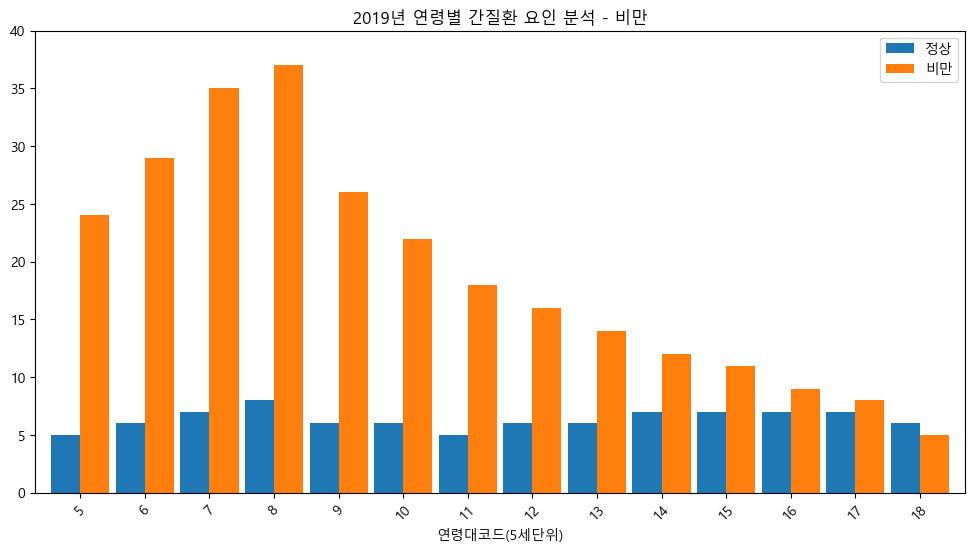

In [35]:
df_2018_F_B.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 비만')
plt.ylim(0,40)

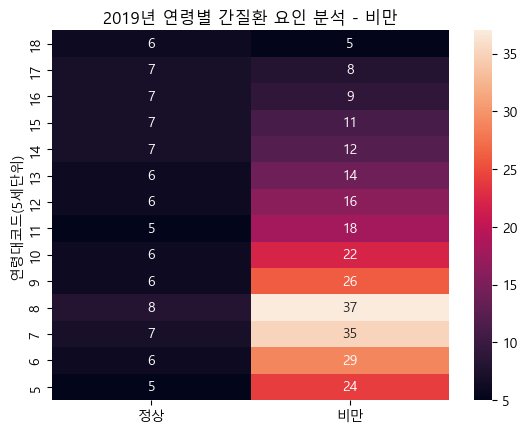

In [36]:
import seaborn as sns
sns.heatmap(df_2018_F_B.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 비만');

In [37]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 정상, 흡연, 비음주
df_2018_F_S =  df_2018_all[True][False][True]
df_2018_F_S = pd.merge(df_2018_F_S, df_2018_T1, left_index=True, right_index=True)
df_2018_F_S.columns=['흡연','비흡연']
df_2018_F_S['흡연/비흡연'] =(df_2018_F_S['흡연'] / df_2018_F_S['비흡연']).round(1)
df_2018_F_S.head()

,흡연,비흡연,흡연/비흡연
연령대코드(5세단위),,,
5,13.0,5.0,2.6
6,15.0,6.0,2.5
7,22.0,7.0,3.1
8,26.0,8.0,3.2
9,24.0,6.0,4.0


(0.0, 25.0)

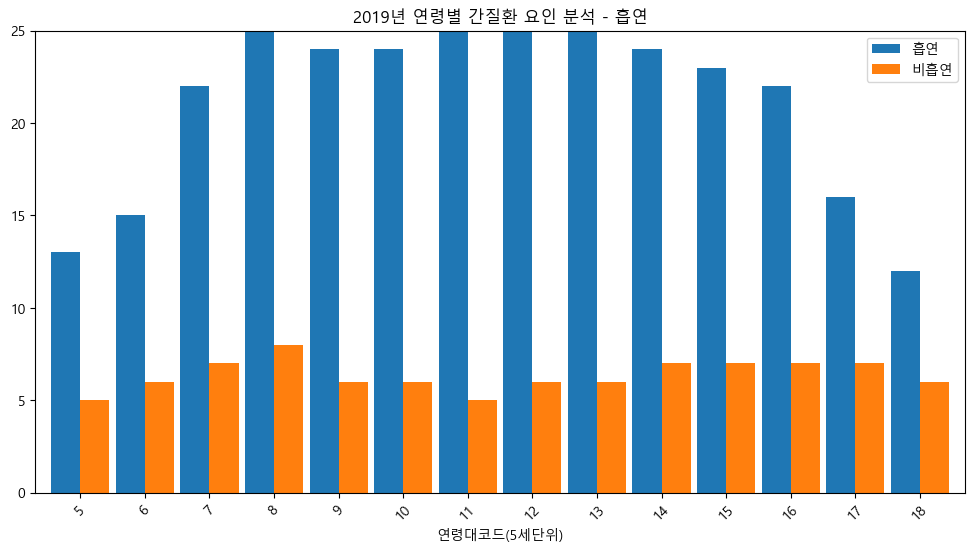

In [38]:
df_2018_F_S.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 흡연')
plt.ylim(0,25)

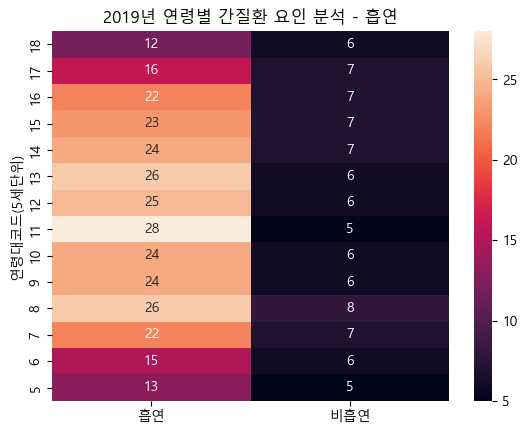

In [39]:
import seaborn as sns
sns.heatmap(df_2018_F_S.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 흡연');

In [40]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 정상, 비흡연, 음주
df_2018_F_D =  df_2018_all[True][False][True]
df_2018_F_D = pd.merge(df_2018_F_D, df_2018_T1, left_index=True, right_index=True)
df_2018_F_D.columns=['음주','비음주']
df_2018_F_D['음주/비음주'] =(df_2018_F_D['음주'] / df_2018_F_D['비음주']).round(1)
df_2018_F_D.head()

,음주,비음주,음주/비음주
연령대코드(5세단위),,,
5,13.0,5.0,2.6
6,15.0,6.0,2.5
7,22.0,7.0,3.1
8,26.0,8.0,3.2
9,24.0,6.0,4.0


(0.0, 25.0)

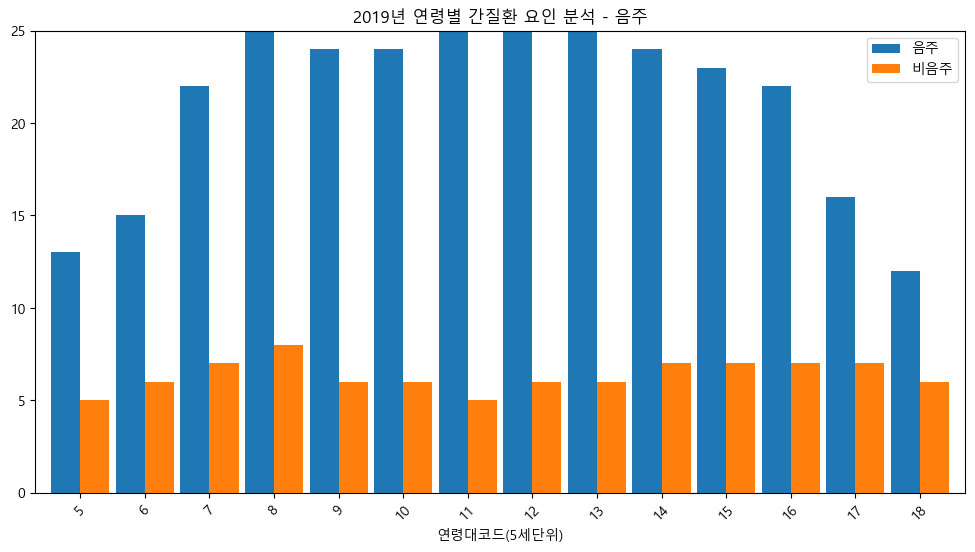

In [41]:
df_2018_F_D.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 음주')
plt.ylim(0,25)

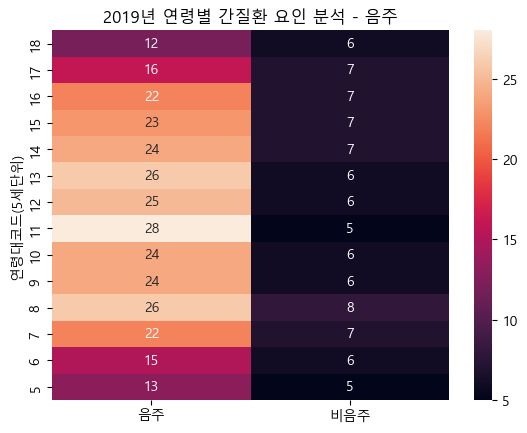

In [42]:
import seaborn as sns
sns.heatmap(df_2018_F_D.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 음주');

In [43]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 비만, 흡연, 비음주
df_2018_F_S_B =  df_2018_all[False][False][True]
df_2018_F_S_B = pd.merge(df_2018_F_S_B, df_2018_T1, left_index=True, right_index=True)
df_2018_F_S_B.columns=['비만&흡연','정상&비흡연']
df_2018_F_S_B['비만&흡연/정상&비흡연'] =(df_2018_F_S_B['비만&흡연'] / df_2018_F_S_B['정상&비흡연']).round(1)
df_2018_F_S_B.head()

,비만&흡연,정상&비흡연,비만&흡연/정상&비흡연
연령대코드(5세단위),,,
5,35.0,5.0,7.0
6,51.0,6.0,8.5
7,61.0,7.0,8.7
8,60.0,8.0,7.5
9,58.0,6.0,9.7


(0.0, 70.0)

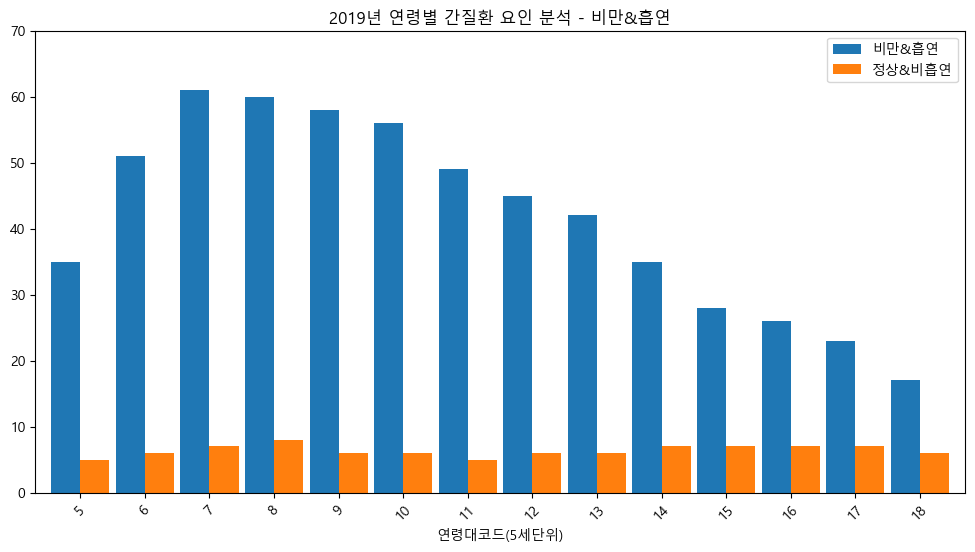

In [44]:
df_2018_F_S_B.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 비만&흡연')
plt.ylim(0,70)

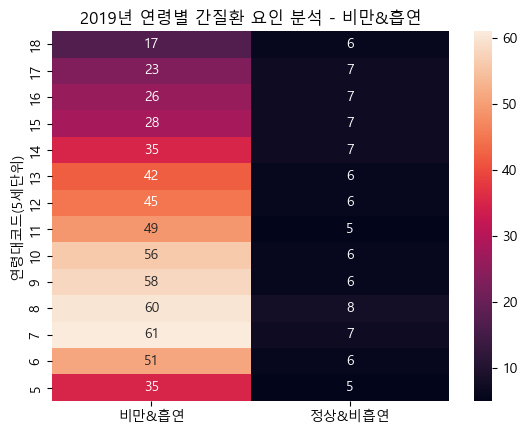

In [45]:
import seaborn as sns
sns.heatmap(df_2018_F_S_B.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 비만&흡연');

In [46]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 비만, 비흡연, 음주
df_2018_F_B_D =  df_2018_all[False][True][False]
df_2018_F_B_D = pd.merge(df_2018_F_B_D, df_2018_T1, left_index=True, right_index=True)
df_2018_F_B_D.columns=['비만&음주','정상&비음주']
df_2018_F_B_D['비만&음주/정상&비음주'] =(df_2018_F_B_D['비만&음주'] / df_2018_F_B_D['정상&비음주']).round(1)
df_2018_F_B_D.head()

,비만&음주,정상&비음주,비만&음주/정상&비음주
연령대코드(5세단위),,,
5,22.0,5.0,4.4
6,35.0,6.0,5.8
7,47.0,7.0,6.7
8,52.0,8.0,6.5
9,45.0,6.0,7.5


(0.0, 100.0)

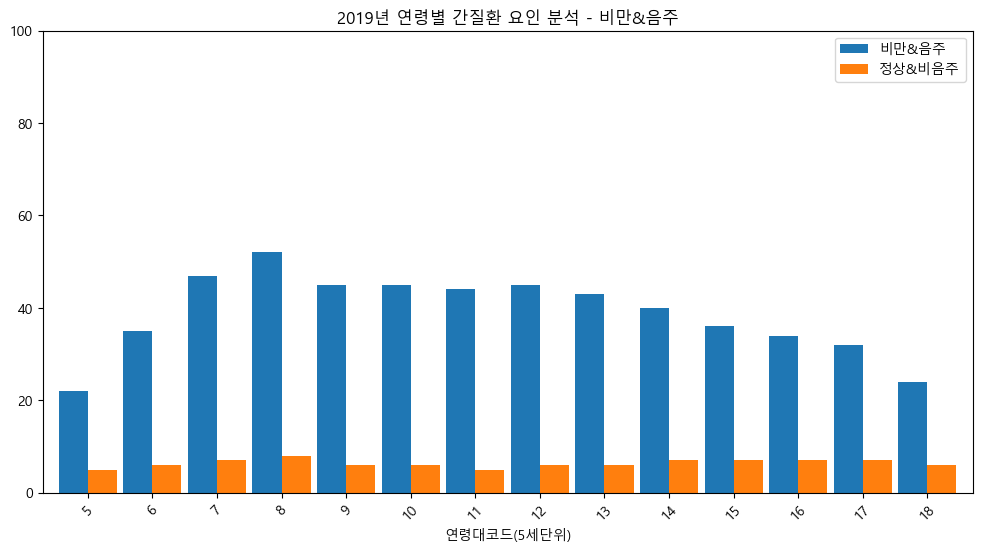

In [47]:
df_2018_F_B_D.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 비만&음주')
plt.ylim(0,100)

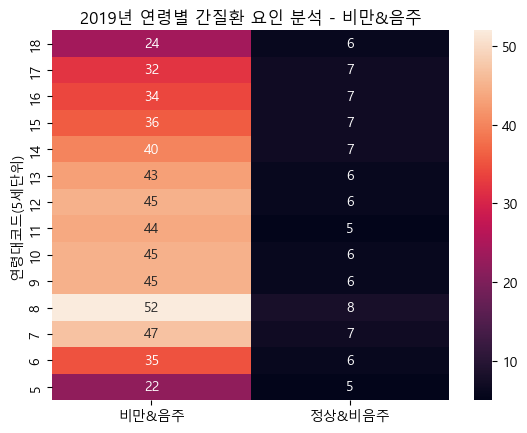

In [48]:
import seaborn as sns
sns.heatmap(df_2018_F_B_D.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 비만&음주');

In [49]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 정상, 흡연, 음주
df_2018_F_S_D =  df_2018_all[True][False][False]
df_2018_F_S_D = pd.merge(df_2018_F_S_D, df_2018_T1, left_index=True, right_index=True)
df_2018_F_S_D.columns=['흡연&음주','비흡연&비음주']
df_2018_F_S_D['흡연&음주/비흡연&비음주'] =(df_2018_F_S_D['흡연&음주'] / df_2018_F_S_D['비흡연&비음주']).round(1)
df_2018_F_S_D.head()

,흡연&음주,비흡연&비음주,흡연&음주/비흡연&비음주
연령대코드(5세단위),,,
5,15.0,5.0,3.0
6,27.0,6.0,4.5
7,36.0,7.0,5.1
8,45.0,8.0,5.6
9,48.0,6.0,8.0


(0.0, 80.0)

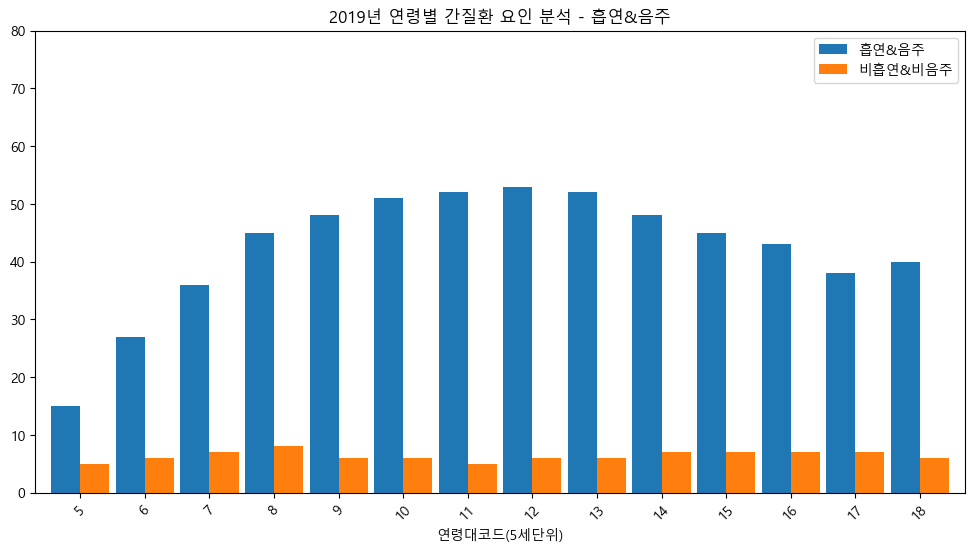

In [50]:
df_2018_F_S_D.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 흡연&음주')
plt.ylim(0,80)

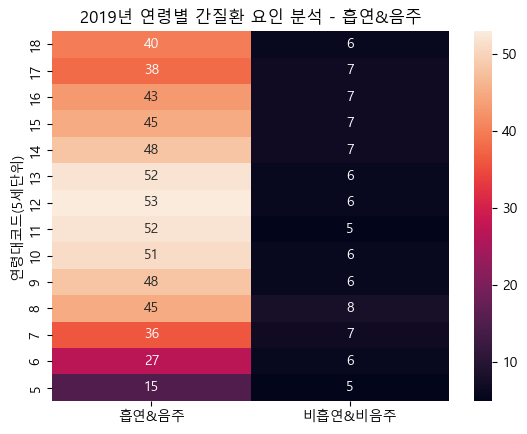

In [51]:
import seaborn as sns
sns.heatmap(df_2018_F_S_D.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 흡연&음주');

In [52]:
df_2018_all = df_2018[['연령대코드(5세단위)','비흡연자','정상','간질환','음주(X)']]
df_2018_all = df_2018_all.pivot_table('간질환','연령대코드(5세단위)',('정상','비흡연자','음주(X)')).round(2)
df_2018_all.dropna(inplace=True)
df_2018_all=df_2018_all*100
# 정상, 비흡연, 비음주
df_2018_T1 =  df_2018_all[True][True][True]
df_2018_T1 = pd.DataFrame(df_2018_T1)
# 비만, 흡연, 음주
df_2018_F_S_B_D =  df_2018_all[False][False][False]
df_2018_F_S_B_D = pd.merge(df_2018_F_S_B_D, df_2018_T1, left_index=True, right_index=True)
df_2018_F_S_B_D.columns=['비만&흡연&음주','정상&비흡연&비음주']
df_2018_F_S_B_D['비만&흡연&음주/정상&비흡연&비음주'] =(df_2018_F_S_B_D['비만&흡연&음주'] / df_2018_F_S_B_D['정상&비흡연&비음주']).round(1)
df_2018_F_S_B_D.head()

,비만&흡연&음주,정상&비흡연&비음주,비만&흡연&음주/정상&비흡연&비음주
연령대코드(5세단위),,,
5,42.0,5.0,8.4
6,62.0,6.0,10.3
7,71.0,7.0,10.1
8,74.0,8.0,9.2
9,74.0,6.0,12.3


(0.0, 80.0)

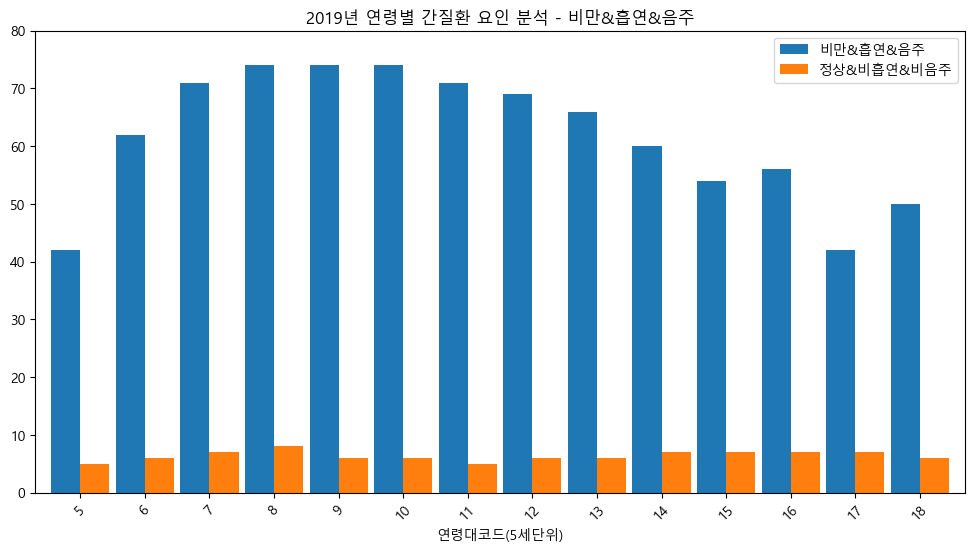

In [53]:
df_2018_F_S_B_D.iloc[:,:2].plot.bar(width=0.9,rot=45,figsize=(12,6))
plt.title('2019년 연령별 간질환 요인 분석 - 비만&흡연&음주')
plt.ylim(0,80)

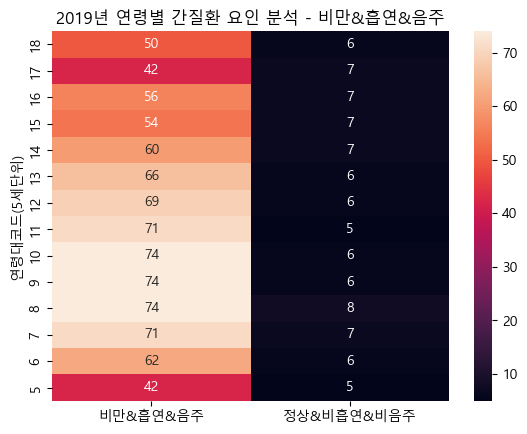

In [54]:
import seaborn as sns
sns.heatmap(df_2018_F_S_B_D.iloc[:,:2].sort_index(ascending=False),annot=True)
plt.title('2019년 연령별 간질환 요인 분석 - 비만&흡연&음주');